## Graphs and charts to explain our economic rationale

In [1]:
import pandas as pd

df = pd.read_csv('./data/gravity.csv', low_memory=False)

In [2]:
#Redo cleaning steps
columns = ['year', 'iso3_o', 'iso3_d', 'distw', 'comlang_off', 'comlang_ethno', 'comcol', 'col45','heg_o', 'heg_d', 'col_dep_ever', 'sibling_ever', 'gdp_o', 'gdp_d', 'eu_o', 'eu_d', 'tradeflow_comtrade_o', 'tradeflow_comtrade_d', 'tradeflow_baci', 'tradeflow_imf_o', 'tradeflow_imf_d']
df = df[columns]

pd.options.mode.chained_assignment = None
df['tradeflow'] = df[['tradeflow_comtrade_o', 'tradeflow_comtrade_d', 'tradeflow_baci', 'tradeflow_imf_o', 'tradeflow_imf_d']].mean(axis=1)
df = df.drop(['tradeflow_comtrade_o', 'tradeflow_comtrade_d', 'tradeflow_baci', 'tradeflow_imf_o', 'tradeflow_imf_d'], axis=1)
df[['tradeflow', 'gdp_o', 'gdp_d', 'distw']] = df[['tradeflow', 'gdp_o', 'gdp_d', 'distw']].replace(0,1)

df['both_eu'] = (df['eu_o'] == 1) & (df['eu_d'] == 1)
df['both_eu'] = df['both_eu'].astype(int)

In [3]:
no_trade = df[df['tradeflow'].isna() & (df['iso3_o'] != df['iso3_d'])]

In [4]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.titlesize'] = 30

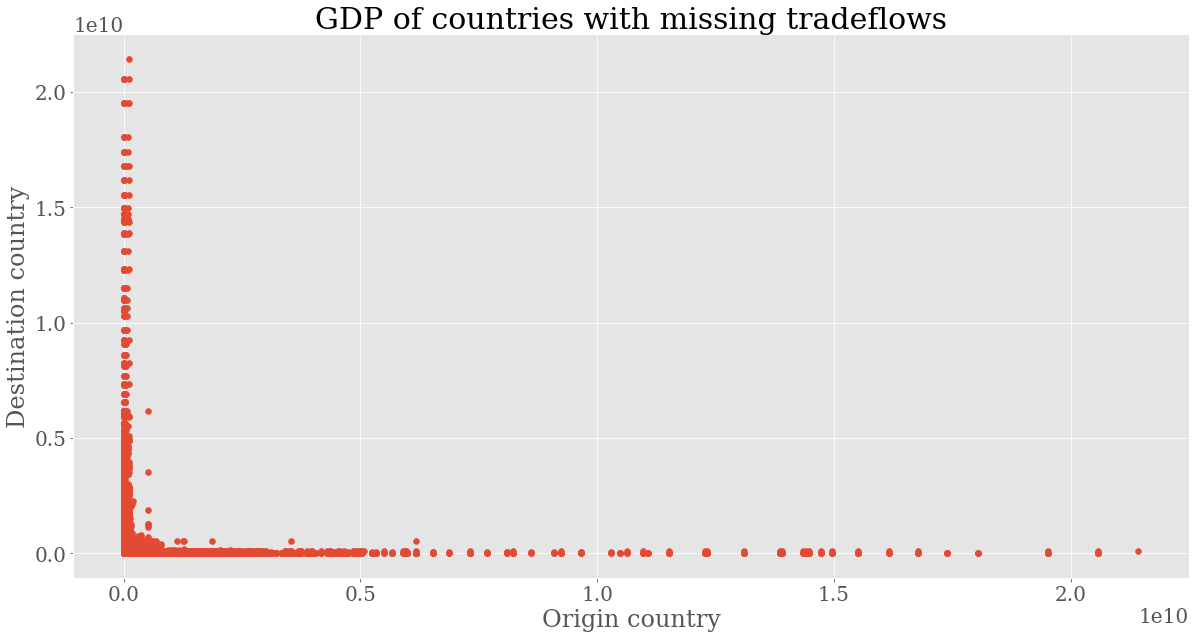

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(no_trade['gdp_o'], no_trade['gdp_d'])
plt.title('GDP of countries with missing tradeflows')
plt.xlabel('Origin country')
plt.ylabel('Destination country')
plt.show()

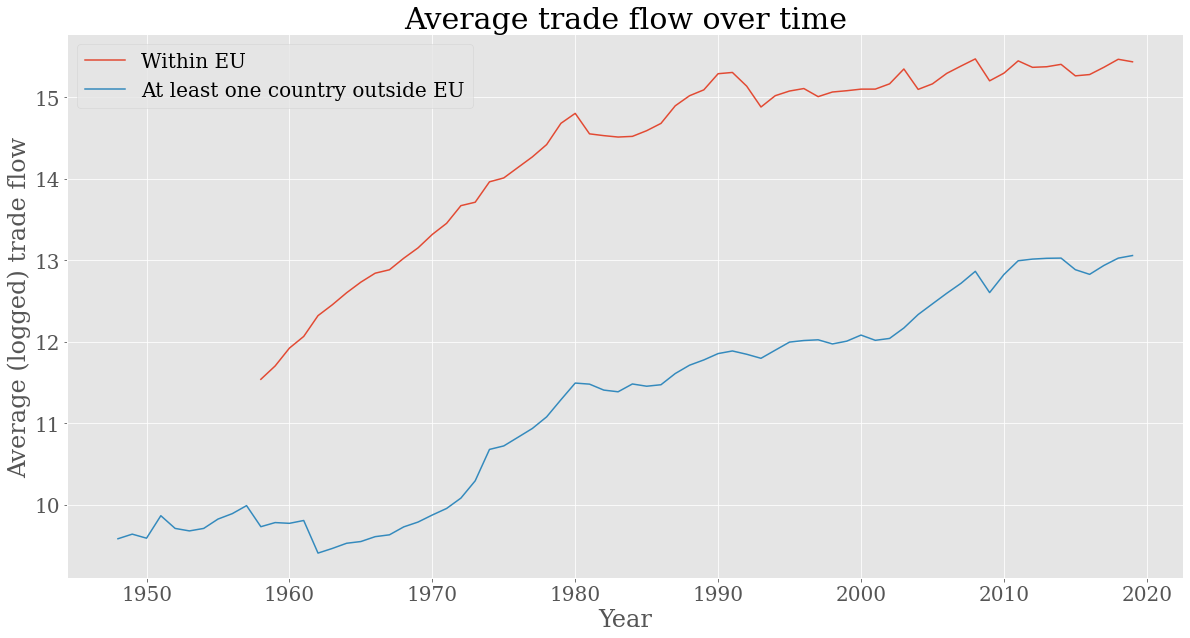

In [6]:
import numpy as np

plt.figure(figsize=(20,10))
plt.plot(np.log(df[df['both_eu'] == 1].groupby('year').mean()['tradeflow']), label='Within EU')
plt.plot(np.log(df[df['both_eu'] == 0].groupby('year').mean()['tradeflow']), label='At least one country outside EU')
plt.title('Average trade flow over time')
plt.xlabel('Year')
plt.ylabel('Average (logged) trade flow')
plt.legend()
plt.show()